### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [4]:
y = df['diabetes']
x = df.drop('diabetes', axis=1)

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x, x_test, y, y_test = train_test_split(x,y,random_state=5,
                                        stratify=y, test_size=0.05)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x,y,random_state=5,
                                        stratify=y)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [10]:
arvore.fit(x_train, y_train)

print(f'Acurácia de treino: {arvore.score(x_train, y_train)}')
print(f'Acurácia de teste: {arvore.score(x_val, y_val)}')

Acurácia de treino: 0.7571428571428571
Acurácia de teste: 0.776595744680851


In [11]:
random_forest.fit(x_train, y_train)

print(f'Acurácia de treino: {arvore.score(x_train, y_train)}')
print(f'Acurácia de teste: {arvore.score(x_val, y_val)}')

Acurácia de treino: 0.7571428571428571
Acurácia de teste: 0.776595744680851


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

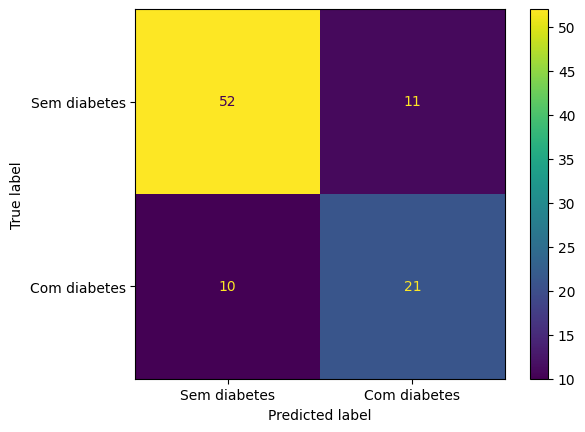

In [13]:
previsao_arvore = arvore.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, previsao_arvore,
                                        display_labels = [ 'Sem diabetes','Com diabetes']);

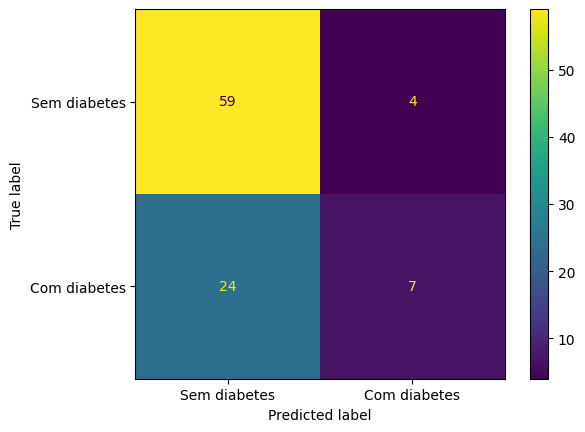

In [14]:
previsao_rf = random_forest.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, previsao_rf,
                                        display_labels = [ 'Sem diabetes','Com diabetes']);

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [16]:
previsao_arvore = arvore.predict(x_val)

print(f'Acurácia (Decision Tree): {accuracy_score(y_val, previsao_arvore)}')
print(f'Recall (Decision Tree): {recall_score(y_val, previsao_arvore)}')
print(f'Precisão (Decision Tree): {precision_score(y_val, previsao_arvore)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, previsao_arvore)}')

Acurácia (Decision Tree): 0.776595744680851
Recall (Decision Tree): 0.6774193548387096
Precisão (Decision Tree): 0.65625
F1_Score (Decision Tree): 0.6666666666666666


In [17]:
previsao_rf = random_forest.predict(x_val)

print(f'Acurácia (Random Forest): {accuracy_score(y_val, previsao_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, previsao_rf)}')
print(f'Precisão (Random Forest): {precision_score(y_val, previsao_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, previsao_rf)}')

Acurácia (Random Forest): 0.7021276595744681
Recall (Random Forest): 0.22580645161290322
Precisão (Random Forest): 0.6363636363636364
F1_Score (Random Forest): 0.3333333333333333


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [18]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

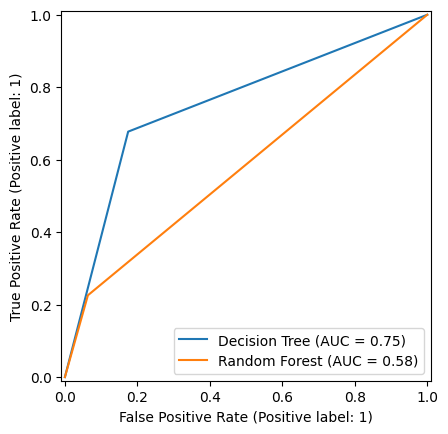

In [19]:
curva_roc = RocCurveDisplay.from_predictions(y_val, previsao_arvore, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_val, previsao_rf, name = 'Random Forest', ax = curva_roc.ax_)

In [20]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, previsao_arvore)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, previsao_rf)}')

AUC (Decision Tree): 0.7514080901177674
AUC (Random Forest): 0.5811571940604199


### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [21]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

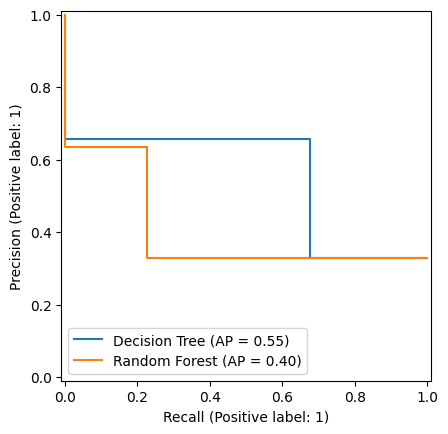

In [22]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, previsao_arvore, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, previsao_rf, name = 'Random Forest', ax = curva_precision_recall.ax_)

In [23]:
print(f'AP (Decision Tree): {average_precision_score(y_val, previsao_arvore)}')
print(f'AP (Random Forest): {average_precision_score(y_val, previsao_rf)}')

AP (Decision Tree): 0.5509394303363074
AP (Random Forest): 0.3990141635989268


### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [24]:
from sklearn.metrics import classification_report

In [25]:
print('Decision Tree')
print(classification_report(y_val, previsao_arvore))
print('Random Forest')
print(classification_report(y_val, previsao_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

Random Forest
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        63
           1       0.64      0.23      0.33        31

    accuracy                           0.70        94
   macro avg       0.67      0.58      0.57        94
weighted avg       0.69      0.70      0.65        94



# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [26]:
def intervalo_conf(resultados, nome_modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confiança ({nome_modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [27]:
from sklearn.model_selection import cross_val_score, KFold

In [28]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.5337181765177326, 0.8684155361422958]
Intervalo de confiança (Random Forest): [0.5993493779846124, 0.7798824854577775]


### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [31]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, x, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.271659875902482, 0.7462406274736961]
Intervalo de confiança (Random Forest): [-0.02607104530183163, 0.6489851400014963]


### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [32]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [34]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arvore = cross_val_score(arvore, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Acurácia média (Decision Tree): {resultado_arvore.mean()}')
print(f'Acurácia média (Random Forest):{resultado_rf.mean()}')

Acurácia média (Decision Tree): 0.7085561497326203
Acurácia média (Random Forest):0.6711229946524064


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

In [36]:
df['diabetes'].value_counts(normalize = True)

,proportion
diabetes,
0,0.670051
1,0.329949


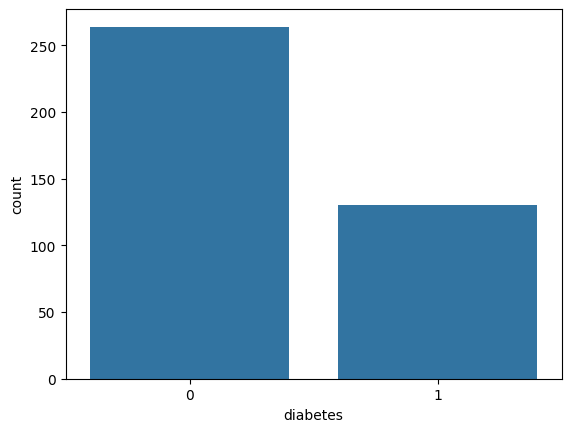

In [38]:
import seaborn as sns

sns.countplot(df, x = 'diabetes');

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [39]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

In [40]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arvore.mean()}')

F1 (Decision Tree):0.5932071108915667


In [41]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6167365020253852


### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [42]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

In [43]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arvore.mean()}')

F1 (Decision Tree):0.5449681473471796


In [44]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6383056347429271


### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



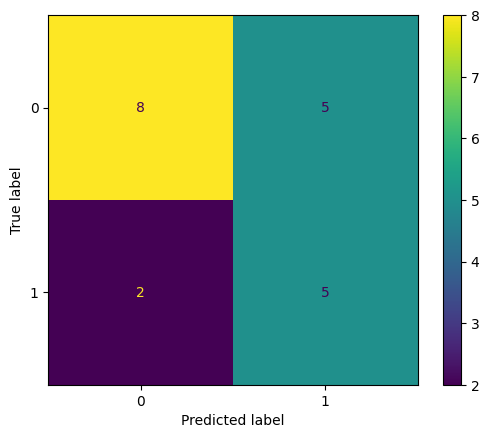

In [45]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);